##  Student grades prediction 

* C SOMA SEKHAR GOUD
* Batch.No: DS2307

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

import math

In [3]:
df = pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
# Extract unique grades
all_grades = df.iloc[:, 2:-1].values.flatten()
unique_grades = set(all_grades)

# Print unique grades
print("Unique Grades:", unique_grades)


Unique Grades: {nan, 'B+', 'C-', 'C+', 'A', 'D', 'A-', 'WU', 'I', 'C', 'F', 'A+', 'D+', 'B', 'W', 'B-'}


There 15 unique values thats representing the grades assigned/Scored

In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

* There are total 41 courses 

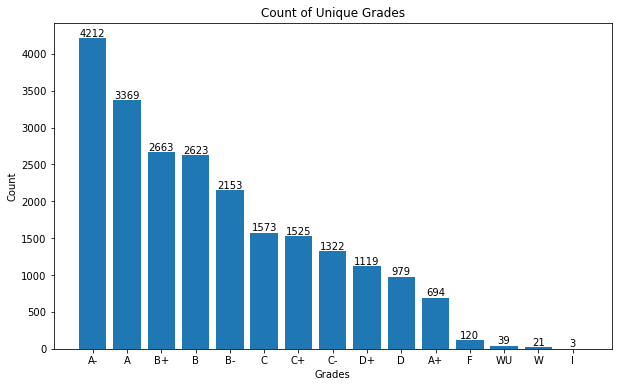

In [6]:
# Visualize the count of unique grades
grade_counts = pd.Series(all_grades).value_counts()

# Adjusting figure size
plt.figure(figsize=(10, 6))

plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grades')
plt.ylabel('Count')

# Annotate the bars with count values
for i, v in enumerate(grade_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Count of Unique Grades')
plt.show()

### This just gives brief idea on total grades and which grades did students get most

Grades from
* A+ to D: cleared the course
* F : Fail
* WU : Withdraw Unauthorized
* W : Withdrawal
* I :Incomplete


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

CGPA is the only numeric attribute

In [8]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

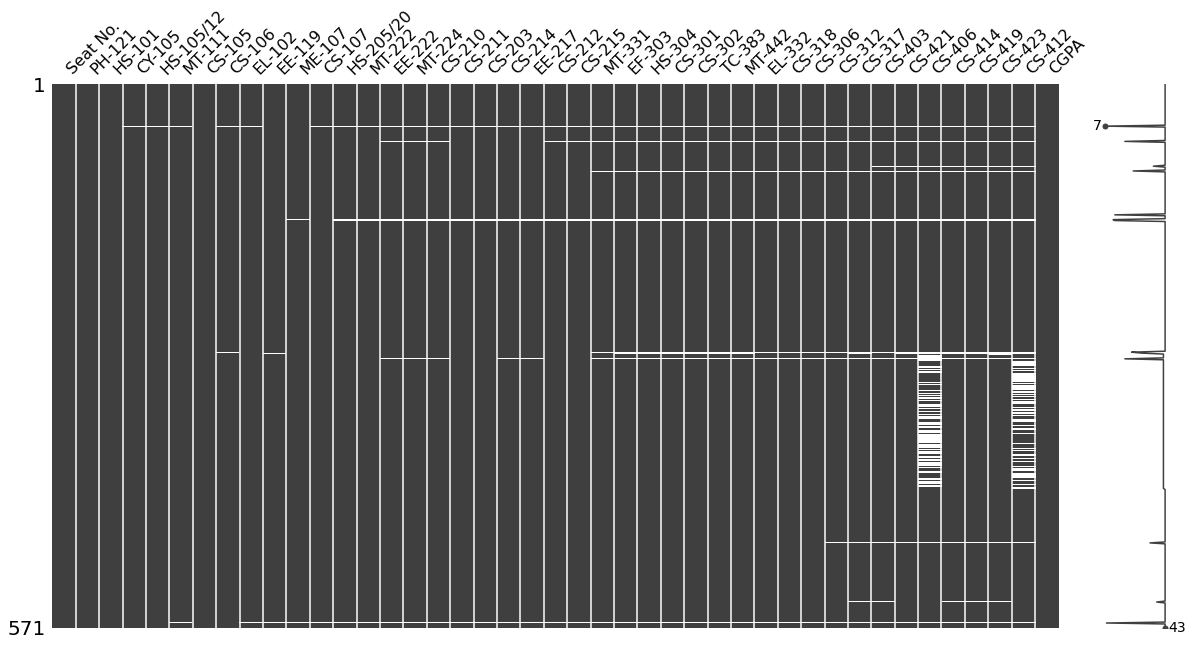

In [9]:
# Visualize null values using missingno
msno.matrix(df, figsize=(20, 10))
plt.show()

### * We can see that there are few missing grades(null values) which we need to deal with 

Since the grades are the impact of the respective individual's performance, So in order to fill the null values we have cases to think of.

* 1.Try to replace null values with the most common grade an individual gets in rest of the courses.
* 2.Replace null values with of the grades scored scored by the rest of the students in respective course.

So we can make an assumption that if total good grades in a course are high its Medium/easy, if low its moderate/tough.

Since we don't have enough information on the course hours/weightage to decide how easy or difficult the course is, with the constraints in the data '2' will be best suitable.


In [12]:
# Replace NaN values with the mode of each column
df = df.fillna(df.mode().iloc[0])


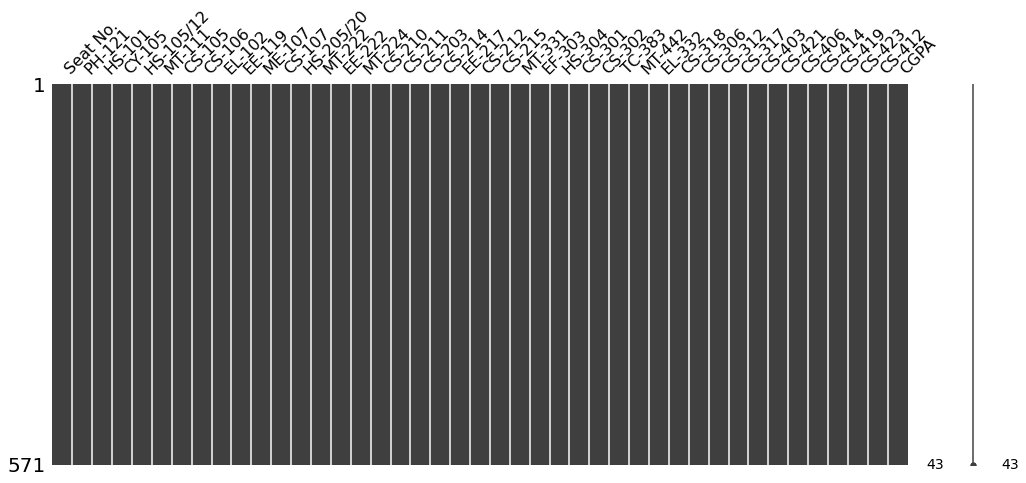

In [11]:
#Checking again for null values
msno.matrix(df, figsize=(17, 7))
plt.show()

Null values cleared

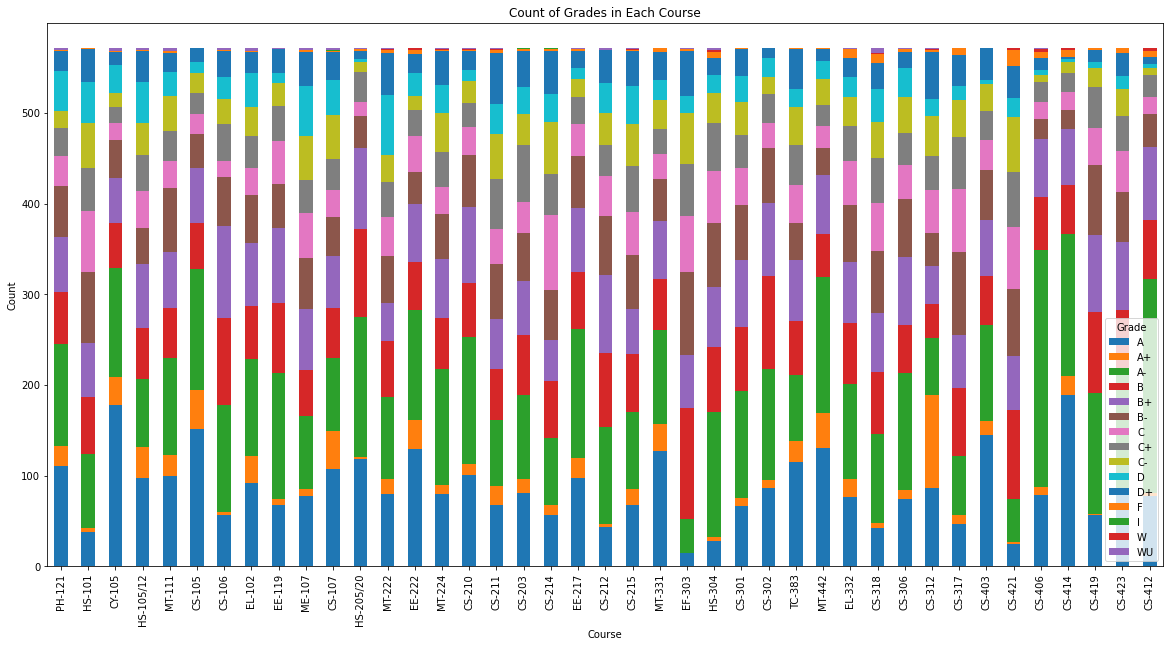

In [13]:
# Extracting columns with grades
grades_data = df.iloc[:, 1:-1]

# Count of grades for each course
grade_counts = grades_data.apply(lambda x: x.value_counts()).T

# Plotting a grouped bar chart
ax = grade_counts.plot(kind='bar',stacked=True, figsize=(20, 10))
ax.set_title('Count of Grades in Each Course')
ax.set_xlabel('Course')
ax.set_ylabel('Count')
plt.legend(title='Grade')
plt.show()

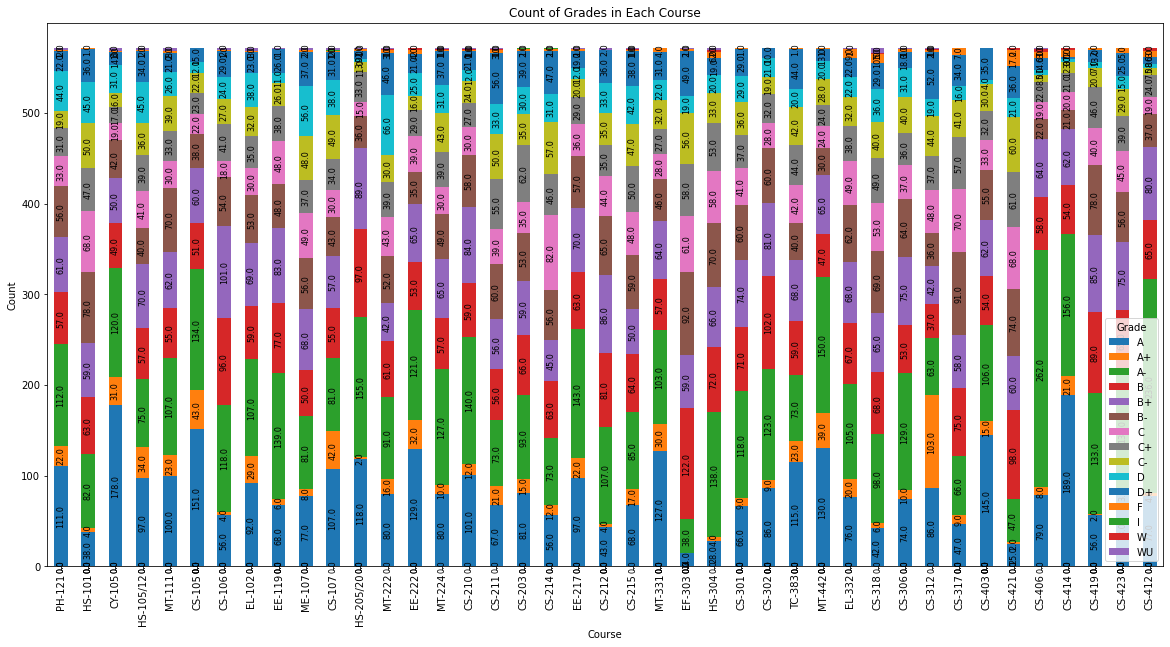

In [14]:
# Extracting columns with grades
grades_data = df.iloc[:, 1:-1]

# Count of grades for each course
grade_counts = grades_data.apply(lambda x: x.value_counts()).T

# Plotting a grouped bar chart with count values
ax = grade_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
ax.set_title('Count of Grades in Each Course')
ax.set_xlabel('Course')
ax.set_ylabel('Count')

# Adding count values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black', rotation='vertical')

plt.legend(title='Grade')
plt.show()

Individual graphs might be clear to see

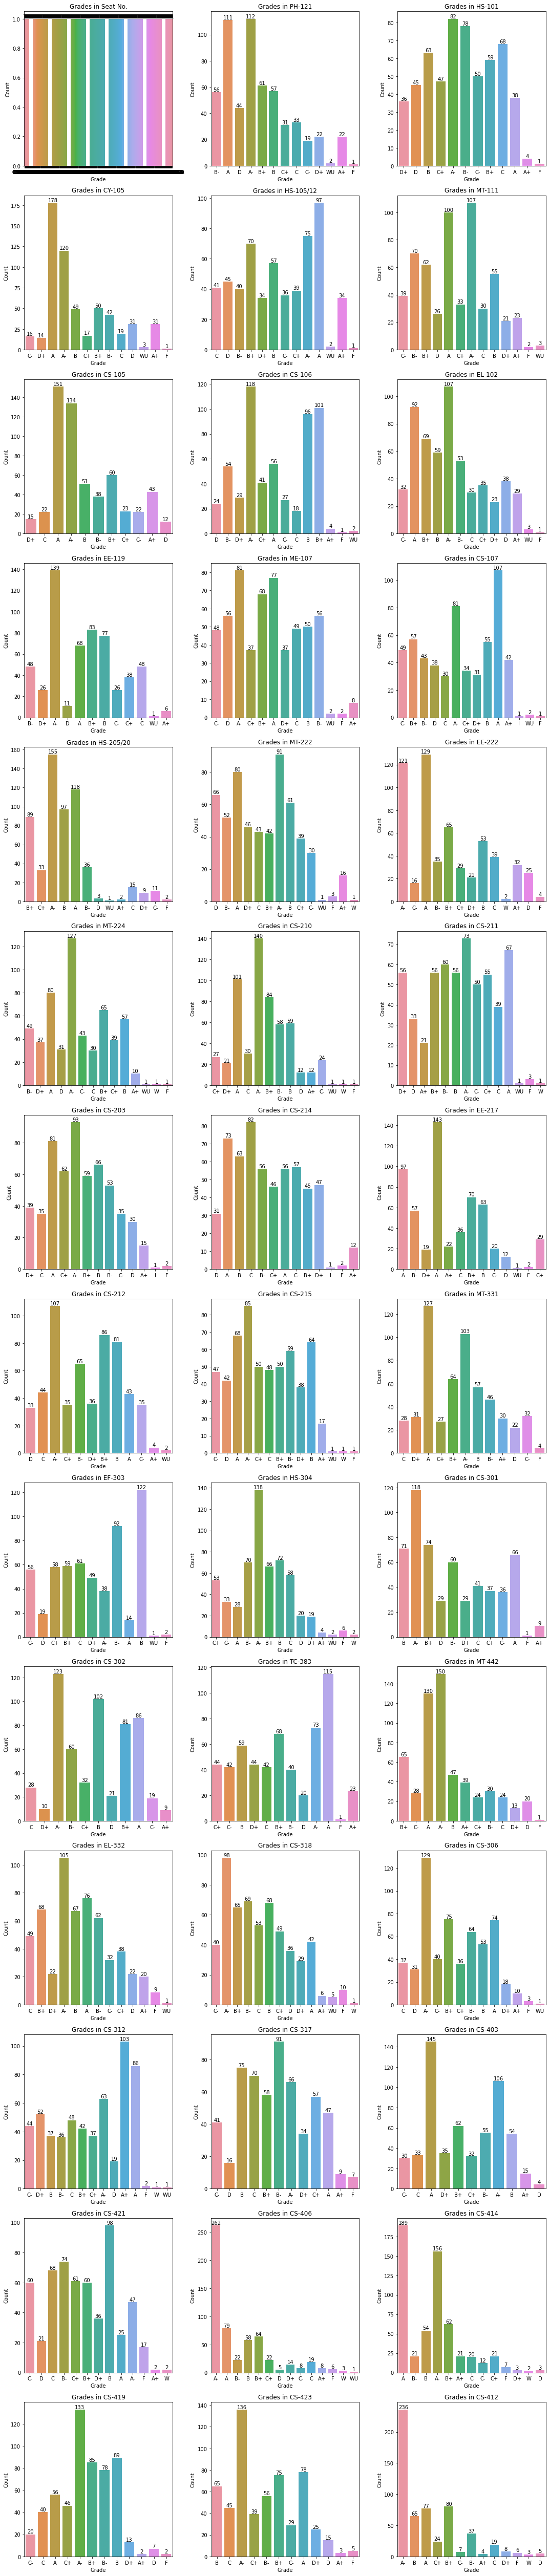

In [15]:
# Extracting columns with grades
grades_data = df.iloc[:, :-1]

# Set up a grid for each course
num_columns = 3  # specify the number of columns in the grid
num_rows = (len(grades_data.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

# Plot grades for each course using Seaborn countplot
for i, column in enumerate(grades_data.columns):
    ax = axes[i // num_columns, i % num_columns]  # Calculate subplot index in the grid
    sns.countplot(x=column, data=grades_data, ax=ax)
    ax.set_title(f'Grades in {column}')
    ax.set_xlabel('Grade')
    ax.set_ylabel('Count')

    # Add count values to the bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                ha='center', va='bottom')

# Remove any empty subplots in the grid
for i in range(len(grades_data.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

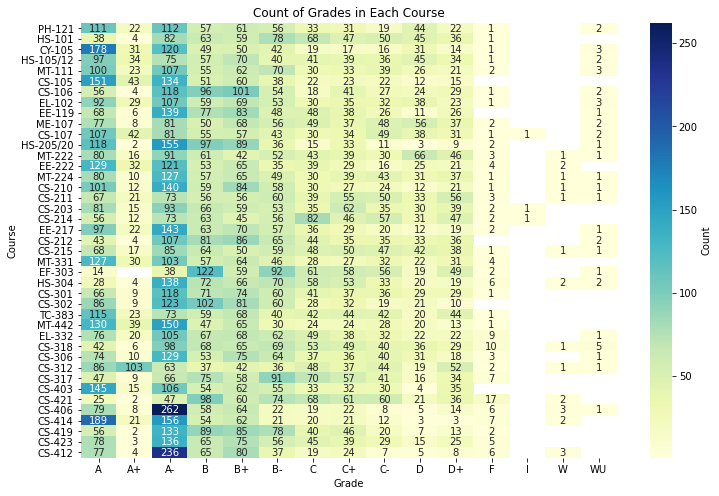

In [16]:
# Extracting columns with grades
grades_data = df.iloc[:, 1:-1]

# Count of grades for each course
grade_counts = grades_data.apply(lambda x: x.value_counts()).T

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grade_counts, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Count of Grades in Each Course')
plt.xlabel('Grade')
plt.ylabel('Course')
plt.show()

 Above Heat map gives the best visual understanding

* we can see I, W,WU are least occuring conditions(Grades)
* A, A- are most scored grades and so on..

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

In [18]:
# Drop the 'Seat No.' column
df = df.drop(columns=['Seat No.'])

In [19]:
df.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


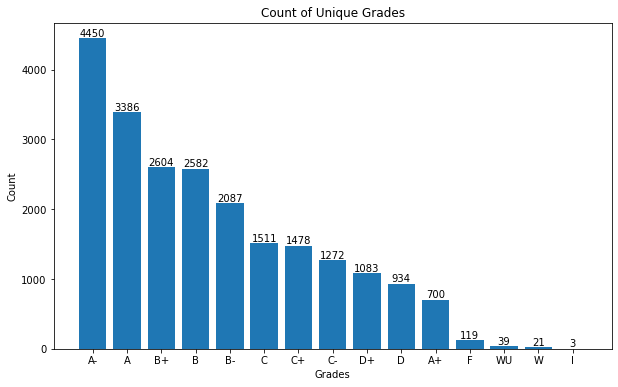

In [20]:
# Extract unique grades
all_grades = df.iloc[:, 2:-1].values.flatten()
unique_grades = set(all_grades)

# Visualize the count of unique grades
grade_counts = pd.Series(all_grades).value_counts()

# Adjusting figure size
plt.figure(figsize=(10, 6))

plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grades')
plt.ylabel('Count')

# Annotate the bars with count values
for i, v in enumerate(grade_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Count of Unique Grades')
plt.show()

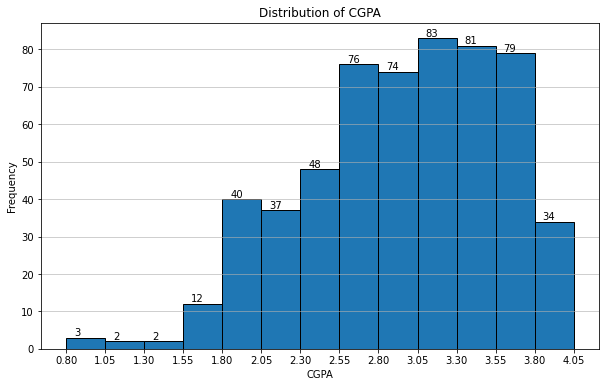

In [21]:
# Plot CGPA distribution with count values and specified x-axis ticks
plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(df['CGPA'], bins=np.arange(df['CGPA'].min(), df['CGPA'].max() + 0.25, 0.25), edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.grid(axis='y', alpha=0.75)

# Add count values to the bars
for count, bin_edge, patch in zip(n, bins, patches):
    plt.text(bin_edge + 0.05, count, str(int(count)), ha='left', va='bottom')

# Set x-axis ticks with a difference of 0.25
plt.xticks(np.arange(df['CGPA'].min(), df['CGPA'].max() + 0.25, 0.25))

plt.show()

We can see that most of the CGPA's range from 2.55to 3.80 

Before going into further analysis we need to work on object data types

So we use label encoding 

In [22]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

# Identify object-type columns
object_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object-type column
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
df.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
5,0,5,3,10,7,2,7,3,4,4,...,6,5,7,7,2,2,4,5,3,3.026
6,5,8,2,9,2,3,0,4,2,4,...,5,6,4,5,0,2,4,4,0,2.957
7,4,4,7,6,6,2,8,2,3,2,...,10,4,4,6,0,4,2,2,2,3.043
8,2,6,2,10,3,2,2,2,4,2,...,4,3,5,7,0,2,4,2,0,3.358
9,0,3,7,3,3,2,6,5,2,0,...,7,5,4,5,0,0,2,3,0,3.247


In [26]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


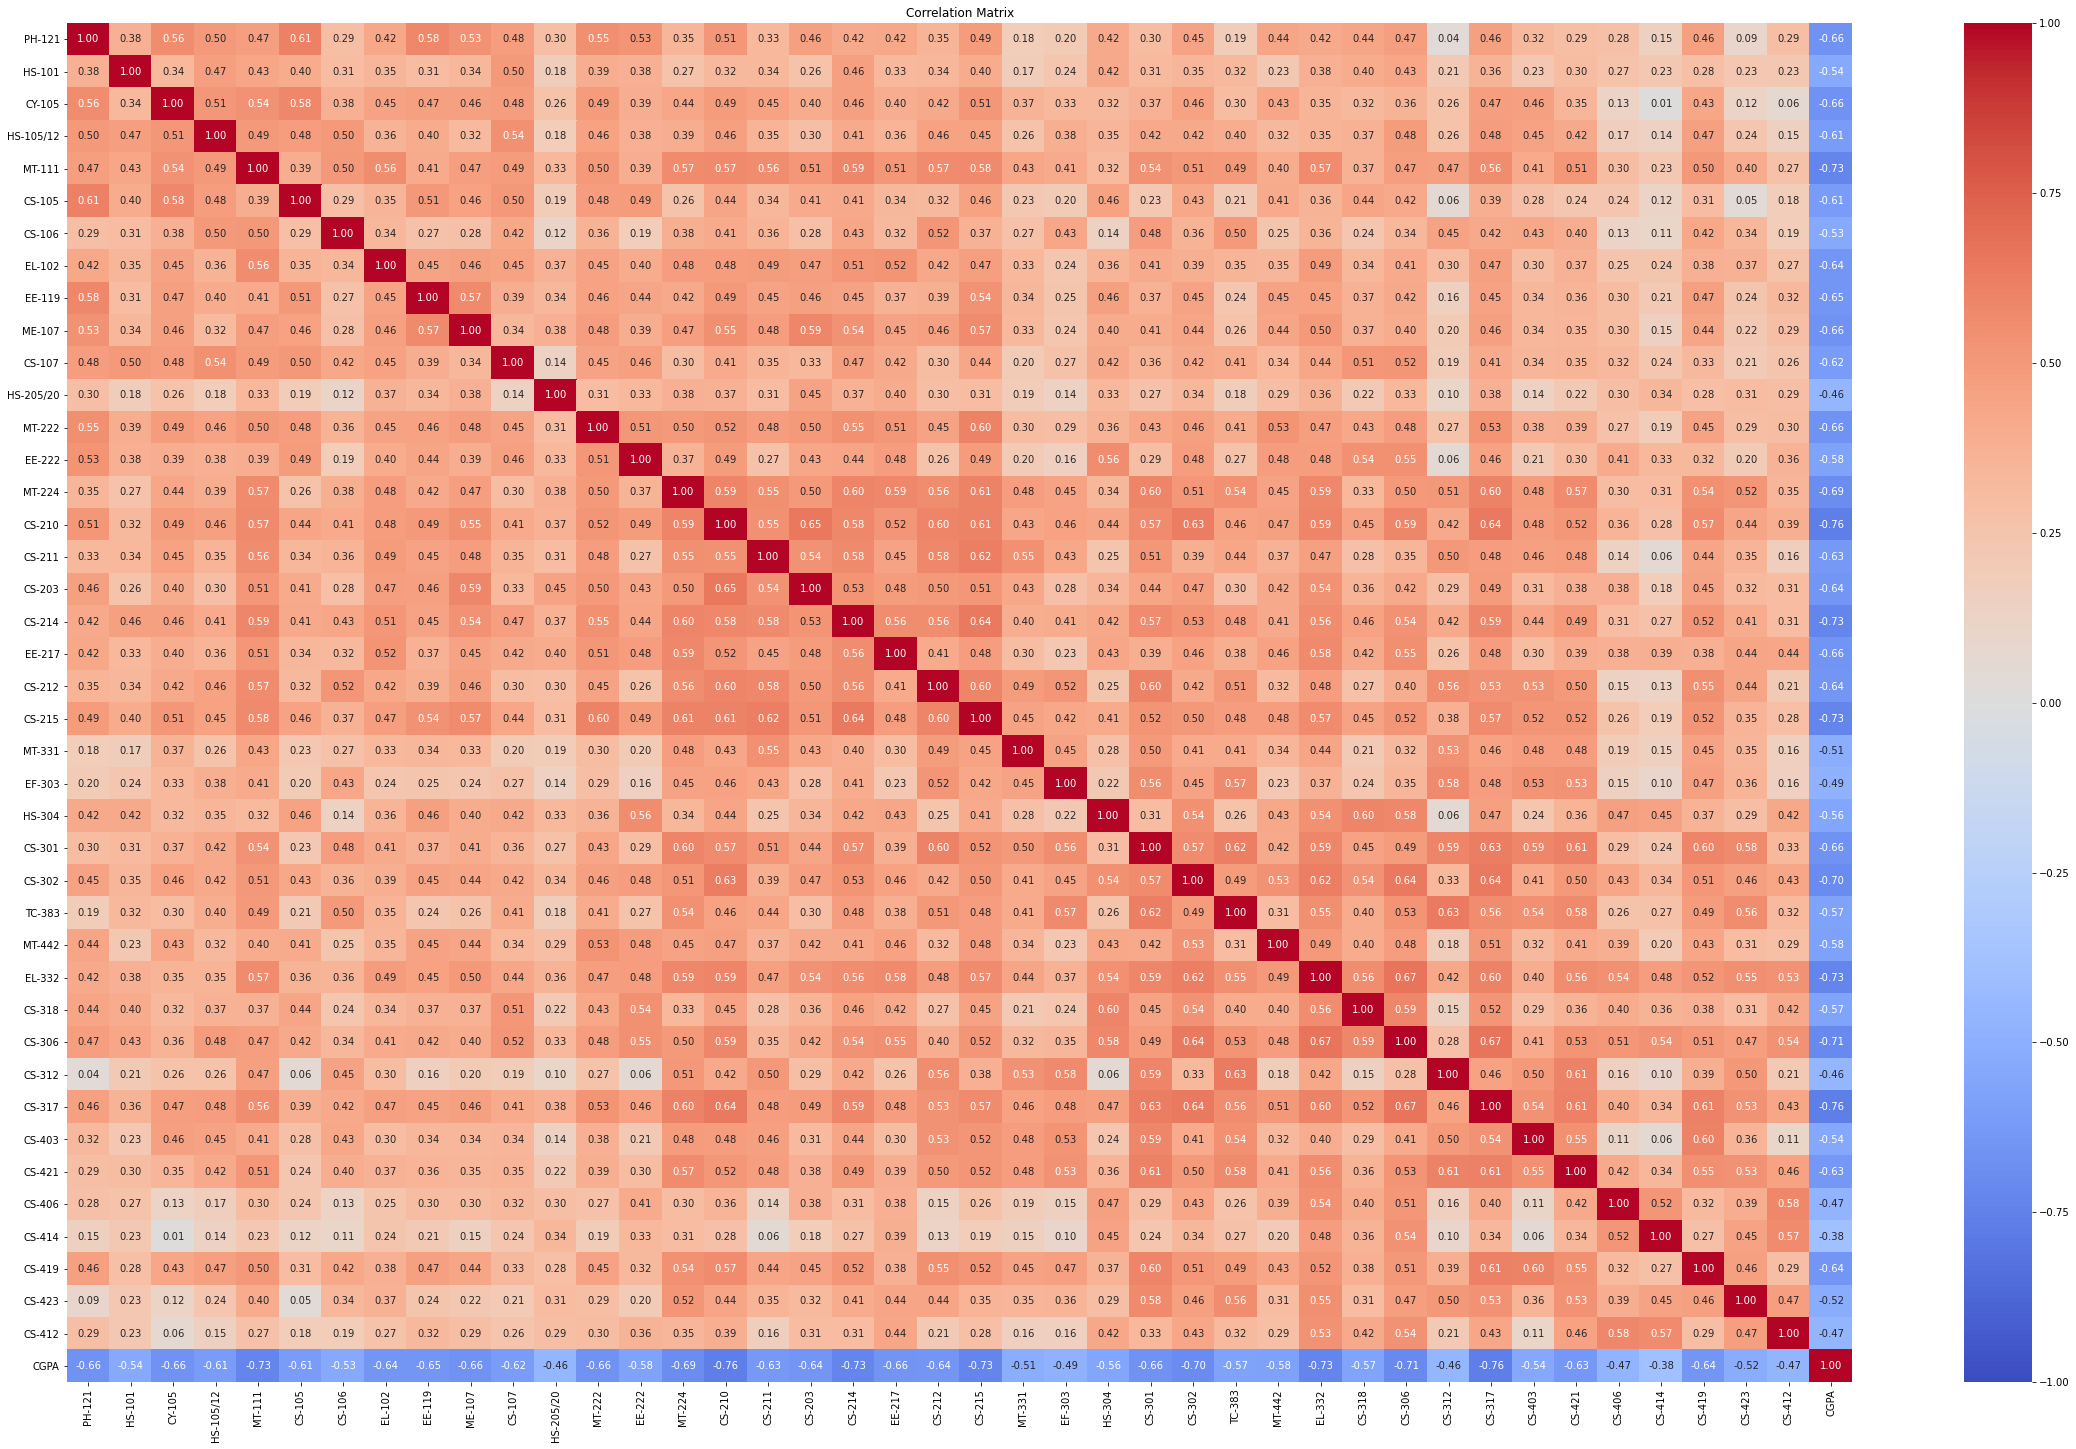

In [27]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

* Positive Correlations:

PH-121, CS-105, EE-119, CS-210, CS-302 have positive correlations with various courses.

* Negative Correlations:

MT-111, CS-106, CS-203, CS-306, CS-412 exhibit negative correlations with other courses.

* Strong Correlations:

CS-210 and CS-317, CS-302 and CS-301, MT-224 and MT-331, EL-332 and CS-214, CS-318 and CS-306 show strong positive correlations.

* Weak Correlations:

CS-414, HS-205/20, TC-383, EF-303, CS-312 display weaker correlations with other courses.

In [28]:
from scipy.stats import pointbiserialr

In [29]:
# Extract 'CGPA' and categorical columns
cgpa = df['CGPA']
categorical_cols = df.drop('CGPA', axis=1)

# Point-Biserial Correlation
correlations = {}
for col in categorical_cols:
    point_biserial_corr, _ = pointbiserialr(cgpa, categorical_cols[col])
    correlations[col] = point_biserial_corr

# Display point-biserial correlations
print("Point-Biserial Correlations:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.4f}")


Point-Biserial Correlations:
PH-121: -0.6631
HS-101: -0.5372
CY-105: -0.6583
HS-105/12: -0.6140
MT-111: -0.7301
CS-105: -0.6132
CS-106: -0.5350
EL-102: -0.6423
EE-119: -0.6468
ME-107: -0.6630
CS-107: -0.6153
HS-205/20: -0.4605
MT-222: -0.6563
EE-222: -0.5753
MT-224: -0.6927
CS-210: -0.7615
CS-211: -0.6281
CS-203: -0.6442
CS-214: -0.7338
EE-217: -0.6560
CS-212: -0.6429
CS-215: -0.7305
MT-331: -0.5084
EF-303: -0.4855
HS-304: -0.5579
CS-301: -0.6641
CS-302: -0.6961
TC-383: -0.5723
MT-442: -0.5826
EL-332: -0.7296
CS-318: -0.5664
CS-306: -0.7083
CS-312: -0.4580
CS-317: -0.7608
CS-403: -0.5445
CS-421: -0.6330
CS-406: -0.4744
CS-414: -0.3840
CS-419: -0.6418
CS-423: -0.5210
CS-412: -0.4665


* Courses like CS-210, CS-317, CS-302, CS-214, and CS-215 have strong negative correlations with other courses, indicating a consistent pattern of lower grades for students who perform well in these courses.


* MT-111, CS-106, CS-203, CS-306, and CS-412 also exhibit negative correlations, suggesting a tendency for students to have lower grades in these courses when their performance is better in other courses.


* Courses such as HS-205/20, TC-383, EF-303, and CS-414 show weaker negative correlations, implying a less consistent relationship with the performance in other courses.

## Modeling

In [30]:
# Assigining Feature and target variable
X=df.drop(['CGPA'],axis=1)
y=df['CGPA']

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply standard scaling only to numerical columns
X= scaler.fit_transform(X)
X
# Now, df contains the standardized numerical columns

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.06032211,
         1.80208667,  2.12462846]])

Each data point is an individual's grade and is crucial in calculating CGPA. So we shall ignore outliers inorder to avoid data(grades)loss

*  We are going to use a "regression model" to understand and quantify the relationship between student grades and CGPA. 


* This model will enable us to make predictions about a student's CGPA based on their grades, providing valuable insights into the potential impact of different courses on overall academic performance. 

In [41]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [34]:

# Define the regression models
regressors = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), 
              GradientBoostingRegressor()]

# Finding the random state
def find_best_random_state_regression(X, y, model, test_size=0.3, max_random_state=200):
    min_mse = float('inf')
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        mse = mean_squared_error(y_test, predictions)
        
        if mse < min_mse:
            min_mse = mse
            best_random_state = random_state

    return min_mse, best_random_state

# Initialize variables to store random state values
lr_rs = svr_rs = dt_reg_rs = rf_reg_rs = gb_reg_rs = None

# Loop through each regression model
for regressor in regressors:
    best_mse, best_random_state = find_best_random_state_regression(X, y, regressor)
    print(f"Best MSE for {regressor.__class__.__name__} is {best_mse} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(regressor, LinearRegression):
        lr_rs = best_random_state
    elif isinstance(regressor, SVR):
        svr_rs = best_random_state
    elif isinstance(regressor, DecisionTreeRegressor):
        dt_reg_rs = best_random_state
    elif isinstance(regressor, RandomForestRegressor):
        rf_reg_rs = best_random_state
    elif isinstance(regressor, GradientBoostingRegressor):
        gb_reg_rs = best_random_state


Best MSE for LinearRegression is 0.013621531018037987 at random state 58
Best MSE for SVR is 0.010254204767843462 at random state 10
Best MSE for DecisionTreeRegressor is 0.04499331395348837 at random state 123
Best MSE for RandomForestRegressor is 0.014883821872092976 at random state 4
Best MSE for GradientBoostingRegressor is 0.010792611793250903 at random state 48


In [51]:
# Set the random seed for reproducibility
np.random.seed(42)  # You can use any seed value

# Assuming you have X and y defined

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=lr_rs)  # Use the best random state for Linear Regression

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(), 
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=dt_reg_rs),
    'Random Forest Regressor': RandomForestRegressor(random_state=rf_reg_rs),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=gb_reg_rs)
}

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'R2 Score': [], 'CV Score': [], 'Difference': []}

# Loop through each model
for model_name, model in models.items():
    # Set random seed for models that support it
    if model_name in ['Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor']:
        np.random.seed(42)  # You can use any seed value
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
        
    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation score
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    
    # Calculate the difference between accuracy and cross-validation score
    diff = accuracy + cv_score
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['R2 Score'].append(r2)
    results['CV Score'].append(cv_score)
    results['Difference'].append(diff)

# Print the results
for i in range(len(results['Model'])):
    print(f"Model: {results['Model'][i]}")
    print(f"R2 Score: {results['R2 Score'][i]:.4f}")
    print(f"CV Score: {results['CV Score'][i]:.4f}")
    print(f"Difference: {results['Difference'][i]:.4f}")
    print("-" * 50)

Model: Linear Regression
R2 Score: 0.9622
CV Score: -0.0375
Difference: 0.9183
--------------------------------------------------
Model: SVR
R2 Score: 0.9571
CV Score: -0.0367
Difference: 0.9191
--------------------------------------------------
Model: Decision Tree Regressor
R2 Score: 0.7074
CV Score: -0.0885
Difference: 0.8673
--------------------------------------------------
Model: Random Forest Regressor
R2 Score: 0.9469
CV Score: -0.0360
Difference: 0.9198
--------------------------------------------------
Model: Gradient Boosting Regressor
R2 Score: 0.9558
CV Score: -0.0262
Difference: 0.9295
--------------------------------------------------


> ### * In regression tasks, a lower mean squared error (MSE) is desirable, as it indicates better predictive performance. 
> ### * Based on the above metrics, the "Gradient Boosting Regressor" is performing the best among the models.Looking at results  it has a relatively low CV score, resulting in the smallest difference between accuracy and cross-validation score. This indicates good generalization performance.

In [52]:
# Train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=gb_reg_rs)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)



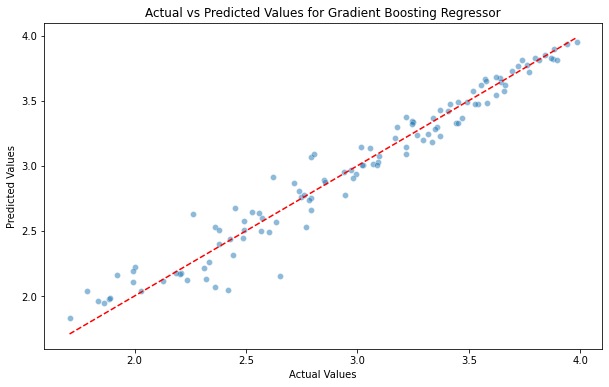

In [54]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted values using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5)
sns.lineplot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

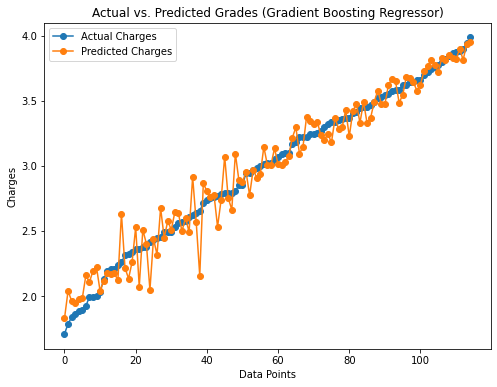

In [57]:
# Sort the actual and predicted values based on actual values
sorted_indices = y_test.argsort()
y_test_sorted_gb = y_test.iloc[sorted_indices]
y_pred_sorted_gb = y_pred[sorted_indices]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_sorted_gb)), y_test_sorted_gb, label="Actual Charges", marker='o')
plt.plot(range(len(y_pred_sorted_gb)), y_pred_sorted_gb, label="Predicted Charges", marker='o')
plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted Grades (Gradient Boosting Regressor)")
plt.legend()
plt.show()

> ## Pickel file

In [70]:
import pickle
# Specify the file path for the Pickle file
pickle_file_path = "student_grades_GB_regressor_model.pkl"

# Save the Gradient boosting model to the Pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(gb_regressor, file)